
# Pure Substance Properties using Canteras and Coolprops built-in EOSs, as well as the Burke Mechanism, P2

This is a comparison between several equations of state using Cantera and CoolProp. \
The fluids considered are H2, O2, N2, CH4 (Reactants), as well as H2O and CO2 (Products). \
The following EOS are used:

1. The ideal gas EOSs in Canteras gri30 and gri30_ion Mechanisms, and the Burke Mechanism
2. The Redlich-Kwong EOS from Canteras h2o2.yaml (does not have CO2, CH4!)
3. The Purefluid EOSs from Cantera (Diverse sources)
4. The Helmholtz energy EOS (HEOS) from CoolProp
5. The Suave-Redlich-Kwong & Peng-Robinson EOSs from Coolprop

Code Structure: https://cantera.org/stable/examples/python/thermo/equations_of_state.html \
Canteras Purefluid Objects: https://cantera.org/stable/python/importing.html#pure-fluid-phases \
High Level CoolProp Cubics usage: http://www.coolprop.org/coolprop/Cubics.html#cubic-backend \
Coolprop Low Level Interface: http://www.coolprop.org/coolprop/LowLevelAPI.html \
Burke Mechanism: https://burke.me.columbia.edu/content/mechanisms-and-downloads

# We are using this ipynb script to plot the results made in a previous script

For that we will be importing and executing Basic_Properties_with_EOS_variation.ipynb (might take a while)

In [1]:
#importing nbformat, which enables us to do inline execution
import nbformat
from IPython import get_ipython

def run_notebook(path):
    with open(path) as f:
        nb = nbformat.read(f, as_version=4)
    shell = get_ipython()
    for cell in nb.cells:
        if cell.cell_type == 'code':
            shell.run_cell(cell.source)

# Example usage
run_notebook('Basic_Properties_with_EOS_variation.ipynb')

Valid temperature range for Hydrogen: 13.8 K to 5000.0 K
Tmin of CO2: 13.957 K
Tmax of CO2: 1000.0 K
Saved CO2_pressure_varied.csv
Saved CO2_temperature_varied.csv
Saved H2_pressure_varied.csv
Saved H2_temperature_varied.csv
Saved CH4_pressure_varied.csv
Saved CH4_temperature_varied.csv
Saved N2_pressure_varied.csv
Saved N2_temperature_varied.csv
Saved O2_pressure_varied.csv
Saved O2_temperature_varied.csv
Saved H2O_pressure_varied.csv
Saved H2O_temperature_varied.csv
All tables generated successfully!


# Plotting the Results

We will not be plotting the GRION and Burke results, as both are identical to GRI (due to all Mechanisms using the ideal gas law). \
With 6 species X 6 examined Parameters X 2 Cases, we have 72 Graphs available to be plotted total, we will only be picking a couple as cases to present\
The full dataset is available in csv format in the /DataResults Folder for any analysis \
To help with plotting, we will set up two helper functions as well:

In [26]:
#For a variable p
def plot_p(p, name, *datasets, labels=None, colors=None):
    line_width = 3
    fig, ax = plt.subplots()

    if labels is None:
        labels = [f"Dataset {i+1}" for i in range(len(datasets))]
    if colors is None:
        default_colors = ["b", "c", "k", "r", "g", "m", "y","magenta","navy","teal"]
        colors = default_colors[:len(datasets)]

    for y, label, color in zip(datasets, labels, colors):
        ax.plot(p / 101325, y, "-", color=color, linewidth=line_width, label=label)
    ax.set_xlabel("Pressure [atm]")
    ax.set_ylabel(name)
    ax.grid(True)
    plt.tight_layout()
    return ax

In [27]:
#Variable T
def plot_T(T, name, *datasets, labels=None, colors=None):
    line_width = 3
    fig, ax = plt.subplots()

    if labels is None:
        labels = [f"Dataset {i+1}" for i in range(len(datasets))]
    if colors is None:
        default_colors = ["b", "c", "k", "r", "g", "m", "y","magenta","navy","teal"]
        colors = default_colors[:len(datasets)]

    for y, label, color in zip(datasets, labels, colors):
        ax.plot(T, y, "-", color=color, linewidth=line_width, label=label)
    ax.set_xlabel("Temperature [K]")
    ax.set_ylabel(name)
    ax.grid(True)
    plt.tight_layout()
    return ax

The NIST reference Data was read into csv files beforehand, which can be accessed through pandas, then plotted on top.

In [4]:
#Import Reference Values for Case 1
CO2_ref = pd.read_csv('Fluid Reference Data/CO2 NIST Reference 300K 1to300atm.csv')
H2_ref = pd.read_csv('Fluid Reference Data/H2 NIST Reference 300K 1to300atm.csv')
CH4_ref = pd.read_csv('Fluid Reference Data/CH4 NIST Reference 300K 1to300atm.csv')
O2_ref = pd.read_csv('Fluid Reference Data/O2 NIST Reference 300K 1to300atm.csv')
N2_ref = pd.read_csv('Fluid Reference Data/N2 NIST Reference 300K 1to300atm.csv')
H2O_ref = pd.read_csv('Fluid Reference Data/H2O NIST Reference 300K 1to300atm.csv')
#CO2_ref.head()
#H2_ref.head()
#CH4_ref.head()
#O2_ref.head()
#N2_ref.head()
H2O_ref.head() #looks good

,Temperature (K),Pressure (atm),Density (kg/m3),Volume (m3/kg),Internal Energy (kJ/kg),Enthalpy (kJ/kg),Entropy (J/g*K),Cv (J/g*K),Cp (J/g*K),Sound Spd. (m/s),Joule-Thomson (F/atm),Viscosity (uPa*s),Therm. Cond. (W/m*K),Phase,Adjusted Internal Energy,Adjusted Enthalpy,Adjusted Entropy
0,300,1,996.56,0.001004,112.55,112.65,0.39306,4.1302,4.1806,1501.5,-0.040168,853.74,0.60950,liquid,0.00,0.00,0.00000
1,300,2,996.60,0.001003,112.54,112.75,0.39303,4.1298,4.1803,1501.7,-0.040167,853.73,0.60956,liquid,-0.01,0.10,-0.00003
2,300,3,996.65,0.001003,112.54,112.84,0.39301,4.1295,4.1801,1501.9,-0.040167,853.72,0.60961,liquid,-0.01,0.19,-0.00005
3,300,4,996.69,0.001003,112.53,112.93,0.39298,4.1292,4.1798,1502.0,-0.040167,853.72,0.60967,liquid,-0.02,0.28,-0.00008
4,300,5,996.74,0.001003,112.52,113.03,0.39295,4.1288,4.1795,1502.2,-0.040166,853.71,0.60973,liquid,-0.03,0.38,-0.00011


In [5]:
#Setting Figure format to svg to make exports better!
%config InlineBackend.figure_formats = ['svg']

In [6]:
#Import Reference Values for Case 2
H2_ref_T = pd.read_csv('Fluid Reference Data/H2 NIST Reference 14to1000K 100atm.csv')
CO2_ref_T = pd.read_csv('Fluid Reference Data/CO2 NIST Reference 217to2000K 100atm.csv')
CH4_ref_T = pd.read_csv('Fluid Reference Data/CH4 NIST Reference 90to625K 100atm.csv')
N2_ref_T = pd.read_csv('Fluid Reference Data/N2 NIST Reference 63to2000K 100atm.csv')
O2_ref_T = pd.read_csv('Fluid Reference Data/O2 NIST Reference 54to2000K 100atm.csv')
H2O_ref_T = pd.read_csv('Fluid Reference Data/H2O NIST Reference 273to2000K 100atm.csv')
#H2_ref_T.head()
#CO2_ref_T.head()
#CH4_ref_T.head()
#N2_ref_T.head()
#O2_ref_T.head()
#H2O_ref_T.head()

# From here starts the actual Plotting
Done: 20 Graphs (H2, CO2, CH4, N2, O2, H2O)

More graphs that can be done: 52 (CH4, N2, O2, H2O)

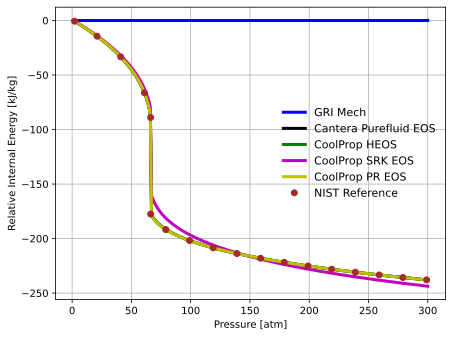

In [78]:
ax = plot_p(p_1, "Relative Internal Energy [kJ/kg]", u_ideal_CO2_GRI, u_Pure_CO2, u_CoolProp_HEOS_CO2, u_CoolProp_SRK_CO2, u_CoolProp_PR_CO2, 
     labels=["GRI Mech", "Cantera Purefluid EOS", "CoolProp HEOS", "CoolProp SRK EOS", "CoolProp PR EOS"],
    colors=["b", "k", "g", "m", "y"])
ax.plot(CO2_ref['Pressure (atm)'], CO2_ref['Adjusted Internal Energy'], " ", label="NIST Reference", color="brown", marker="o", 
        markevery=[1, 20, 40, 60, 66, 67, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]) #Includes values near phase transition, 66.253atm
ax.legend(prop={"size": 11}, frameon=False)
plt.savefig("Graphs/CO2/u-P Graph of CO2.svg")
plt.show()

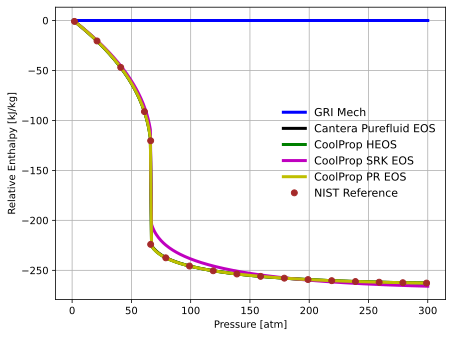

In [79]:
ax = plot_p(p_1, "Relative Enthalpy [kJ/kg]", h_ideal_CO2_GRI, h_Pure_CO2, h_CoolProp_HEOS_CO2, h_CoolProp_SRK_CO2, h_CoolProp_PR_CO2, 
     labels=["GRI Mech", "Cantera Purefluid EOS", "CoolProp HEOS", "CoolProp SRK EOS", "CoolProp PR EOS"],
    colors=["b", "k", "g", "m", "y"])
ax.plot(CO2_ref['Pressure (atm)'], CO2_ref['Adjusted Enthalpy'], " ", label="NIST Reference", color="brown", marker="o", 
        markevery=[1, 20, 40, 60, 66, 67, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300])
ax.legend(prop={"size": 11}, frameon=False)
plt.savefig("Graphs/CO2/h-P Graph of CO2.svg")
plt.show()

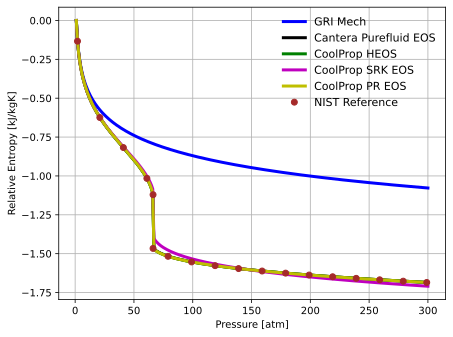

In [80]:
ax = plot_p(p_1, "Relative Entropy [kJ/kgK]", s_ideal_CO2_GRI, s_Pure_CO2, s_CoolProp_HEOS_CO2, s_CoolProp_SRK_CO2, s_CoolProp_PR_CO2, 
     labels=["GRI Mech", "Cantera Purefluid EOS", "CoolProp HEOS", "CoolProp SRK EOS", "CoolProp PR EOS"],
    colors=["b", "k", "g", "m", "y"])
ax.plot(CO2_ref['Pressure (atm)'], CO2_ref['Adjusted Entropy'], " ", label="NIST Reference", color="brown", marker="o", 
        markevery=[1, 20, 40, 60, 66, 67, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300])
ax.legend(prop={"size": 11}, frameon=False)
plt.savefig("Graphs/CO2/s-P Graph of CO2.svg")
plt.show()

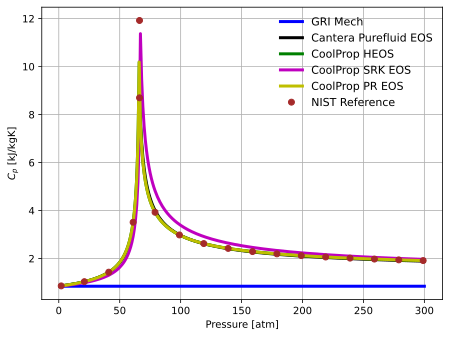

In [81]:
ax = plot_p(p_1, "$C_p$ [kJ/kgK]", cp_ideal_CO2_GRI, cp_Pure_CO2, cp_CoolProp_HEOS_CO2, cp_CoolProp_SRK_CO2, cp_CoolProp_PR_CO2, 
     labels=["GRI Mech", "Cantera Purefluid EOS", "CoolProp HEOS", "CoolProp SRK EOS", "CoolProp PR EOS"],
    colors=["b", "k", "g", "m", "y"])
ax.plot(CO2_ref['Pressure (atm)'], CO2_ref['Cp (J/g*K)'], " ", label="NIST Reference", color="brown", marker="o", 
        markevery=[1, 20, 40, 60, 66, 67, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300])
ax.legend(prop={"size": 11}, frameon=False)
plt.savefig("Graphs/CO2/cp-P Graph of CO2.svg")
plt.show()

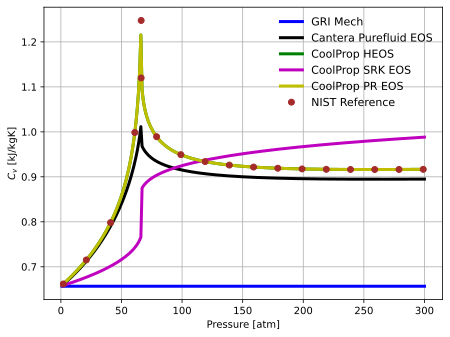

In [82]:
ax = plot_p(p_1, "$C_v$ [kJ/kgK]", cv_ideal_CO2_GRI, cv_Pure_CO2, cv_CoolProp_HEOS_CO2, cv_CoolProp_SRK_CO2, cv_CoolProp_PR_CO2, 
     labels=["GRI Mech", "Cantera Purefluid EOS", "CoolProp HEOS", "CoolProp SRK EOS", "CoolProp PR EOS"],
    colors=["b", "k", "g", "m", "y"])
ax.plot(CO2_ref['Pressure (atm)'], CO2_ref['Cv (J/g*K)'], " ", label="NIST Reference", color="brown", marker="o", 
        markevery=[1, 20, 40, 60, 66, 67, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300])
ax.legend(prop={"size": 11}, frameon=False)
plt.savefig("Graphs/CO2/cv-P Graph of CO2.svg")
plt.show()

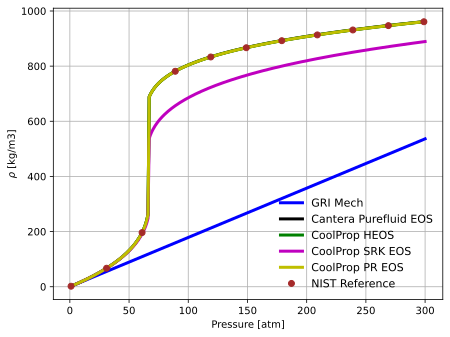

In [83]:
ax = plot_p(p_1, r"$\rho$ [kg/m3]", rho_ideal_CO2_GRI, rho_Pure_CO2, rho_CoolProp_HEOS_CO2, rho_CoolProp_SRK_CO2, rho_CoolProp_PR_CO2, 
     labels=["GRI Mech", "Cantera Purefluid EOS", "CoolProp HEOS", "CoolProp SRK EOS", "CoolProp PR EOS"],
    colors=["b", "k", "g", "m", "y"])
ax.plot(CO2_ref['Pressure (atm)'], CO2_ref['Density (kg/m3)'], " ", label="NIST Reference", color="brown", marker="o", 
        markevery=30)
ax.legend(prop={"size": 11}, frameon=False)
plt.savefig("Graphs/CO2/rho-P Graph of CO2.svg")
plt.show()

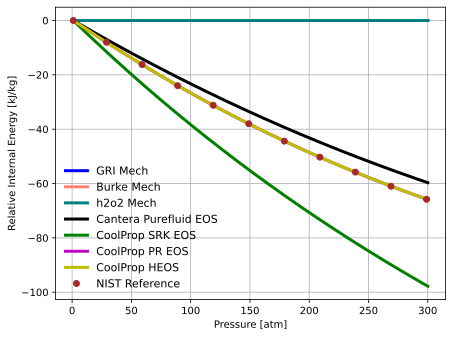

In [84]:
ax = plot_p(p_1, "Relative Internal Energy [kJ/kg]", u_ideal_H2_GRI, u_ideal_H2_Burke , u_RK_H2, u_Pure_H2, u_CoolProp_SRK_H2, u_CoolProp_PR_H2, u_CoolProp_HEOS_H2,
     labels=["GRI Mech", "Burke Mech","h2o2 Mech", "Cantera Purefluid EOS", "CoolProp SRK EOS", "CoolProp PR EOS", "CoolProp HEOS"],
    colors=["b", "salmon", "teal", "k", "g", "m", "y"])
ax.plot(H2_ref['Pressure (atm)'], H2_ref['Adjusted Internal Energy'], " ", label="NIST Reference", color="brown", marker="o", 
        markevery=30)
ax.legend(prop={"size": 11}, frameon=False)
plt.savefig("Graphs/H2/u-P Graph of H2.svg")
plt.show()

Since the RK_EOS seems identical to the Ideal Gas EOS it won't be plotted moving further

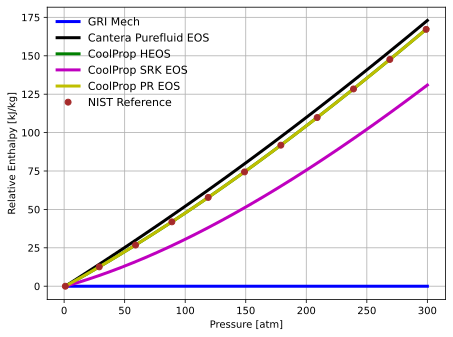

In [85]:
ax = plot_p(p_1, "Relative Enthalpy [kJ/kg]", h_ideal_H2_GRI, h_Pure_H2, h_CoolProp_HEOS_H2, h_CoolProp_SRK_H2, h_CoolProp_PR_H2,
     labels=["GRI Mech", "Cantera Purefluid EOS", "CoolProp HEOS", "CoolProp SRK EOS", "CoolProp PR EOS"],
    colors=["b", "k", "g", "m", "y"])
ax.plot(H2_ref['Pressure (atm)'], H2_ref['Adjusted Enthalpy'], " ", label="NIST Reference", color="brown", marker="o", 
        markevery=30)
ax.legend(prop={"size": 11}, frameon=False)
plt.savefig("Graphs/H2/h-P Graph of H2.svg")
plt.show()

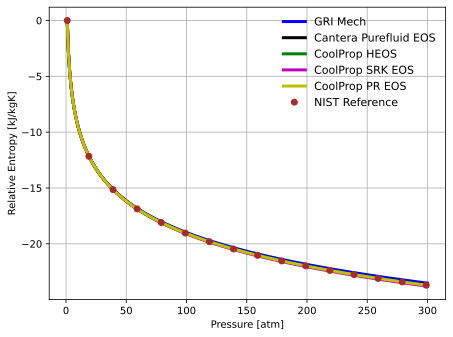

In [86]:
ax = plot_p(p_1, "Relative Entropy [kJ/kgK]", s_ideal_H2_GRI, s_Pure_H2, s_CoolProp_HEOS_H2, s_CoolProp_SRK_H2, s_CoolProp_PR_H2,
     labels=["GRI Mech", "Cantera Purefluid EOS", "CoolProp HEOS", "CoolProp SRK EOS", "CoolProp PR EOS"],
    colors=["b", "k", "g", "m", "y"])
ax.plot(H2_ref['Pressure (atm)'], H2_ref['Adjusted Entropy'], " ", label="NIST Reference", color="brown", marker="o", 
        markevery=20)
ax.legend(prop={"size": 11}, frameon=False)
plt.savefig("Graphs/H2/s-P Graph of H2.svg")
plt.show()

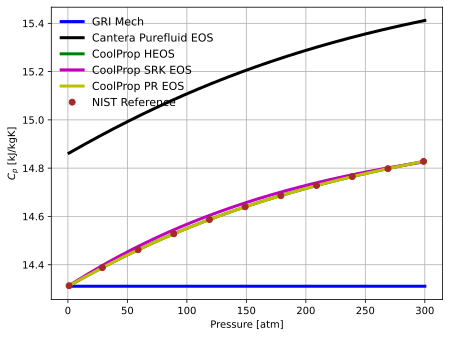

In [87]:
ax = plot_p(p_1, "$C_p$ [kJ/kgK]", cp_ideal_H2_GRI, cp_Pure_H2, cp_CoolProp_HEOS_H2, cp_CoolProp_SRK_H2, cp_CoolProp_PR_H2,
     labels=["GRI Mech", "Cantera Purefluid EOS", "CoolProp HEOS", "CoolProp SRK EOS", "CoolProp PR EOS"],
    colors=["b", "k", "g", "m", "y"])
ax.plot(H2_ref['Pressure (atm)'], H2_ref['Cp (J/g*K)'], " ", label="NIST Reference", color="brown", marker="o", 
        markevery=30)
ax.legend(prop={"size": 11}, frameon=False)
plt.savefig("Graphs/H2/cp-P Graph of H2.svg")
plt.show()

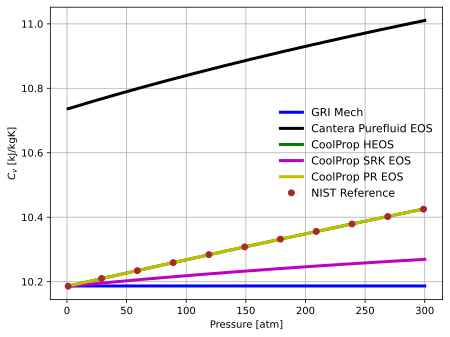

In [88]:
ax = plot_p(p_1, "$C_v$ [kJ/kgK]", cv_ideal_H2_GRI, cv_Pure_H2, cv_CoolProp_HEOS_H2, cv_CoolProp_SRK_H2, cv_CoolProp_PR_H2,
     labels=["GRI Mech", "Cantera Purefluid EOS", "CoolProp HEOS", "CoolProp SRK EOS", "CoolProp PR EOS"],
    colors=["b", "k", "g", "m", "y"])
ax.plot(H2_ref['Pressure (atm)'], H2_ref['Cv (J/g*K)'], " ", label="NIST Reference", color="brown", marker="o", 
        markevery=30)
ax.legend(prop={"size": 11}, frameon=False)
plt.savefig("Graphs/H2/cv-P Graph of H2.svg")
plt.show()

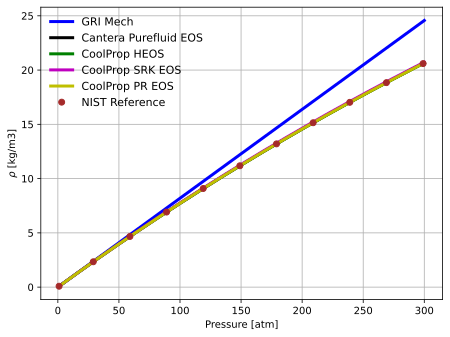

In [89]:
ax = plot_p(p_1, r"$\rho$ [kg/m3]", rho_ideal_H2_GRI, rho_Pure_H2, rho_CoolProp_HEOS_H2, rho_CoolProp_SRK_H2, rho_CoolProp_PR_H2,
     labels=["GRI Mech", "Cantera Purefluid EOS", "CoolProp HEOS", "CoolProp SRK EOS", "CoolProp PR EOS"],
    colors=["b", "k", "g", "m", "y"])
ax.plot(H2_ref['Pressure (atm)'], H2_ref['Density (kg/m3)'], " ", label="NIST Reference", color="brown", marker="o", 
        markevery=30)
ax.legend(prop={"size": 11}, frameon=False)
plt.savefig("Graphs/H2/rho-P Graph of H2.svg")
plt.show()

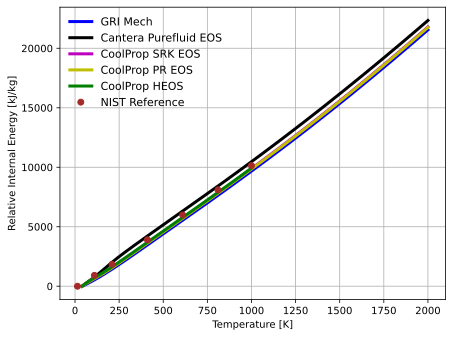

In [185]:
ax = plot_T(T_2, "Relative Internal Energy [kJ/kg]", u_ideal_H2_GRI_Tvar, u_Pure_H2_Tvar, u_CoolProp_SRK_H2_Tvar, u_CoolProp_PR_H2_Tvar,
     labels=["GRI Mech", "Cantera Purefluid EOS", "CoolProp SRK EOS", "CoolProp PR EOS"],
    colors=["b", "k", "m", "y"])
ax.plot(T_2_H2_CP, u_CoolProp_HEOS_H2_Tvar, "-", lw=3, label="CoolProp HEOS", color="g")
ax.plot(H2_ref_T['Temperature (K)'], H2_ref_T['Adjusted Internal Energy'], " ", label="NIST Reference", color="brown", marker="o", 
        markevery=[0, 10, 20, 40, 60, 80, 99])
ax.legend(prop={"size": 11}, frameon=False)
plt.savefig("Graphs/H2/u-T Graph of H2.svg")
plt.show()

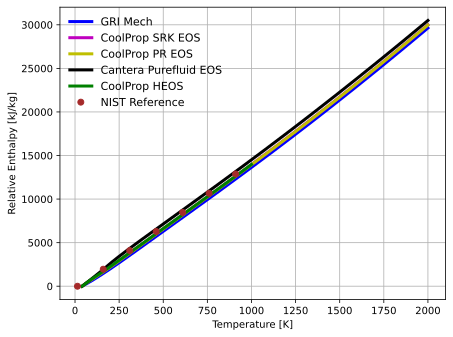

In [186]:
ax = plot_T(T_2, "Relative Enthalpy [kJ/kg]", h_ideal_H2_GRI_Tvar, h_CoolProp_SRK_H2_Tvar, h_CoolProp_PR_H2_Tvar,
     labels=["GRI Mech", "CoolProp SRK EOS", "CoolProp PR EOS"],
    colors=["b", "m", "y"])
ax.plot(T_2_H2, h_Pure_H2_Tvar, "-", lw=3, label="Cantera Purefluid EOS", color="k")
ax.plot(T_2_H2_CP, h_CoolProp_HEOS_H2_Tvar, "-", lw=3, label="CoolProp HEOS", color="g")
ax.plot(H2_ref_T['Temperature (K)'], H2_ref_T['Adjusted Enthalpy'], " ", label="NIST Reference", color="brown", marker="o", 
        markevery=15)
ax.legend(prop={"size": 11}, frameon=False)
plt.savefig("Graphs/H2/h-T Graph of H2.svg")
plt.show()

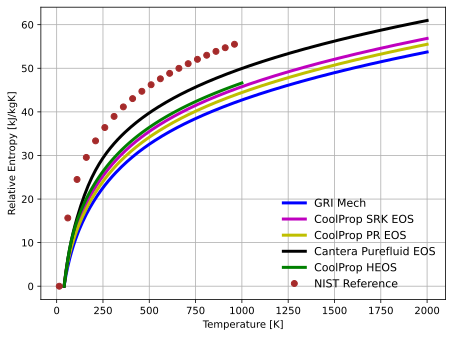

In [187]:
ax = plot_T(T_2, "Relative Entropy [kJ/kgK]", s_ideal_H2_GRI_Tvar, s_CoolProp_SRK_H2_Tvar, s_CoolProp_PR_H2_Tvar,
     labels=["GRI Mech", "CoolProp SRK EOS", "CoolProp PR EOS"],
    colors=["b", "m", "y"])
ax.plot(T_2_H2, s_Pure_H2_Tvar, "-", lw=3, label="Cantera Purefluid EOS", color="k")
ax.plot(T_2_H2_CP, s_CoolProp_HEOS_H2_Tvar, "-", lw=3, label="CoolProp HEOS", color="g")
ax.plot(H2_ref_T['Temperature (K)'], H2_ref_T['Adjusted Entropy'], " ", label="NIST Reference", color="brown", marker="o", 
        markevery=5)
ax.legend(prop={"size": 11}, frameon=False)
plt.savefig("Graphs/H2/s-T Graph of H2.svg")
plt.show()

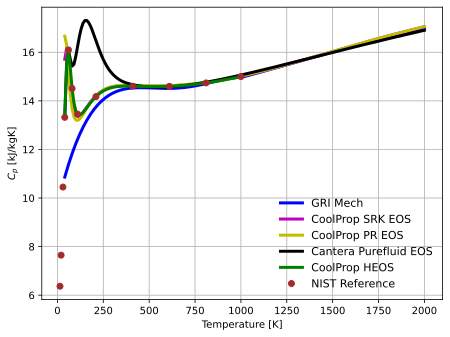

In [188]:
ax = plot_T(T_2, "$C_p$ [kJ/kgK]", cp_ideal_H2_GRI_Tvar, cp_CoolProp_SRK_H2_Tvar, cp_CoolProp_PR_H2_Tvar,
     labels=["GRI Mech", "CoolProp SRK EOS", "CoolProp PR EOS"],
    colors=["b", "m", "y"])
ax.plot(T_2_H2, cp_Pure_H2_Tvar, "-", lw=3, label="Cantera Purefluid EOS", color="k")
ax.plot(T_2_H2_CP, cp_CoolProp_HEOS_H2_Tvar, "-", lw=3, label="CoolProp HEOS", color="g")
ax.plot(H2_ref_T['Temperature (K)'], H2_ref_T['Cp (J/g*K)'], " ", label="NIST Reference", color="brown", marker="o", 
        markevery=[0, 1, 2, 3, 5, 7, 10, 20, 40, 60, 80, 99])
ax.legend(prop={"size": 11}, frameon=False)
plt.savefig("Graphs/H2/cp-T Graph of H2.svg")
plt.show()

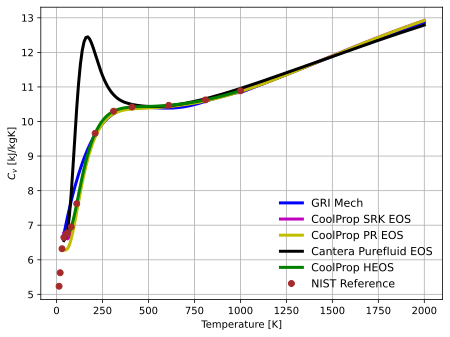

In [189]:
ax = plot_T(T_2, "$C_v$ [kJ/kgK]", cv_ideal_H2_GRI_Tvar, cv_CoolProp_SRK_H2_Tvar, cv_CoolProp_PR_H2_Tvar,
     labels=["GRI Mech", "CoolProp SRK EOS", "CoolProp PR EOS"],
    colors=["b", "m", "y"])
ax.plot(T_2_H2, cv_Pure_H2_Tvar, "-", lw=3, label="Cantera Purefluid EOS", color="k")
ax.plot(T_2_H2_CP, cv_CoolProp_HEOS_H2_Tvar, "-", lw=3, label="CoolProp HEOS", color="g")
ax.plot(H2_ref_T['Temperature (K)'], H2_ref_T['Cv (J/g*K)'], " ", label="NIST Reference", color="brown", marker="o", 
        markevery=[0, 1, 2, 3, 5, 7, 10, 20, 30, 40, 60, 80, 99])
ax.legend(prop={"size": 11}, frameon=False)
plt.savefig("Graphs/H2/cv-T Graph of H2.svg")
plt.show()

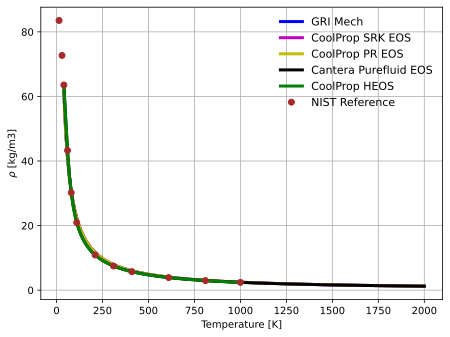

In [190]:
ax = plot_T(T_2, r"$\rho$ [kg/m3]", rho_ideal_H2_GRI_Tvar, rho_CoolProp_SRK_H2_Tvar, rho_CoolProp_PR_H2_Tvar,
     labels=["GRI Mech", "CoolProp SRK EOS", "CoolProp PR EOS"],
    colors=["b", "m", "y"])
ax.plot(T_2_H2, rho_Pure_H2_Tvar, "-", lw=3, label="Cantera Purefluid EOS", color="k")
ax.plot(T_2_H2_CP, rho_CoolProp_HEOS_H2_Tvar, "-", lw=3, label="CoolProp HEOS", color="g")
ax.plot(H2_ref_T['Temperature (K)'], H2_ref_T['Density (kg/m3)'], " ", label="NIST Reference", color="brown", marker="o", 
        markevery=[0, 2, 3, 5, 7, 10, 20, 30, 40, 60, 80, 99])
ax.legend(prop={"size": 11}, frameon=False)
plt.savefig("Graphs/H2/rho-T Graph of H2.svg")
plt.show()

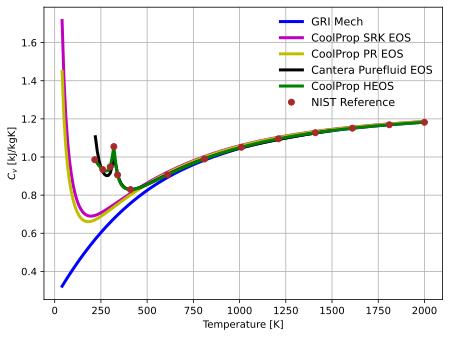

In [140]:
ax = plot_T(T_2, "$C_v$ [kJ/kgK]", cv_ideal_CO2_GRI_Tvar, cv_CoolProp_SRK_CO2_Tvar, cv_CoolProp_PR_CO2_Tvar, 
     labels=["GRI Mech", "CoolProp SRK EOS", "CoolProp PR EOS"],
    colors=["b", "m", "y"])
ax.plot(T_2_CO2, cv_Pure_CO2_Tvar, "-", lw=3, label="Cantera Purefluid EOS", color="k")
ax.plot(T_2_CO2_CP, cv_CoolProp_HEOS_CO2_Tvar, "-", lw=3, label="CoolProp HEOS", color="g")
ax.plot(CO2_ref_T['Temperature (K)'], CO2_ref_T['Cv (J/g*K)'], " ", label="NIST Reference", color="brown", marker="o", 
        markevery=[0, 5, 9, 11, 13, 20, 40, 60, 80, 100, 120, 140, 160, 179])
ax.legend(prop={"size": 11}, frameon=False)
plt.savefig("Graphs/CO2/cv-T Graph of CO2.svg")
plt.show()

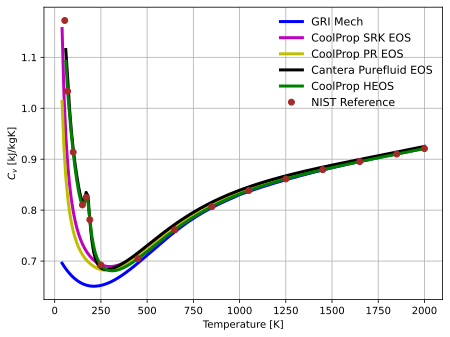

In [112]:
ax = plot_T(T_2, "$C_v$ [kJ/kgK]", cv_ideal_O2_GRI_Tvar, cv_CoolProp_SRK_O2_Tvar, cv_CoolProp_PR_O2_Tvar, 
     labels=["GRI Mech", "CoolProp SRK EOS", "CoolProp PR EOS"],
    colors=["b", "m", "y"])
ax.plot(T_2_O2, cv_Pure_O2_Tvar, "-", lw=3, label="Cantera Purefluid EOS", color="k")
ax.plot(T_2_O2_CP, cv_CoolProp_HEOS_O2_Tvar, "-", lw=3, label="CoolProp HEOS", color="g")
ax.plot(O2_ref_T['Temperature (K)'], O2_ref_T['Cv (J/g*K)'], " ", label="NIST Reference", color="brown", marker="o", 
       markevery=[0, 2, 5, 10, 12, 14, 20, 40, 60, 80, 100, 120, 140, 160, 180, 195])
ax.legend(prop={"size": 11}, frameon=False)
plt.savefig("Graphs/O2/cv-T Graph of O2.svg")
plt.show()

## Bonus: Temperature-Density plots with Pressure Isobars

The following is modified from the Non Ideal EOS Cantera Example. It plots the $T$-$\rho$ diagram of CO2 over a wide pressure
and temperature range. \
The temperature is varied from 250 K to 400 K. The pressure is
changed from 1 bar to 600 bar.

Getting reference data for this requires 10 sets of data (10 Isobars) from the NIST web database
Should we do this for all 6 properties of all 6 species (Totaling 360 Isobars)? Doesn't seem feasible without automation

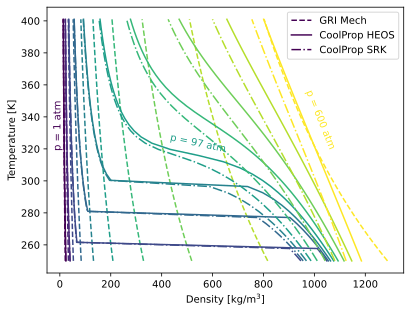

In [51]:
# Input parameters
# Set up arrays for pressure and temperature
p_array = np.logspace(1, np.log10(600), 10, endpoint=True)
T_array = np.linspace(250, 401, 40)  # Temperature is varied from 250K to 400K
p_array = 101325 * np.array(p_array)[:, np.newaxis]

# Calculate densities for GRI Ideal Gas  phase
states = ct.SolutionArray(ideal_gas1, shape=(p_array.size, T_array.size))
states.TPX = T_array, p_array, "CO2:1.0"
density_ideal = states.density


p_HEOS, T_HEOS = np.meshgrid(p_array, T_array)
density_coolprop_HEOS = PropsSI("D", "P", np.ravel(p_HEOS), "T", np.ravel(T_HEOS), "HEOS::CO2")
density_coolprop_HEOS = density_coolprop_HEOS.reshape(p_HEOS.shape)

p_SRK, T_SRK = np.meshgrid(p_array, T_array)
density_coolprop_SRK = PropsSI("D", "P", np.ravel(p_SRK), "T", np.ravel(T_SRK), "SRK::CO2")
density_coolprop_SRK = density_coolprop_SRK.reshape(p_SRK.shape)

# Plot
import cycler
color = plt.cm.viridis(np.linspace(0, 1, p_array.size))
plt.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)

fig, ax = plt.subplots()
ideal_line = ax.plot(density_ideal.T, T_array, "--", label="GRI Mech")
CP_line = ax.plot(density_coolprop_HEOS, T_array, "-", label="CoolProp HEOS")
CP2_line = ax.plot(density_coolprop_SRK, T_array, "-.", label="CoolProp SRK")
ax.text(-27.5, 320, "p = 1 atm", color=color[0], rotation="vertical")
ax.text(430, 318, "p = 97 atm", color=color[5], rotation=-12)
ax.text(960, 320, "p = 600 atm", color=color[9], rotation=-68)
ax.set_xlabel("Density [kg/m$^3$]")
ax.set_ylabel("Temperature [K]")
ax.legend(handles=[ideal_line[0], CP_line[0], CP2_line[0]])
plt.savefig("Graphs/BonusExample_rhoCO2_along_Isobars.svg")

The figure compares $T-\rho$ plots for ideal, R-K, and Helmholtz EoS at
different operating pressures. All three EoS yield the same plots at low pressures (0
bar and 10 bar), but depart at higher pressures. 

CoolProps SRK EOS tends to a different grouped density than the HEOS, and as such underpredicts Densities.

The ideal gas EOS differs significantly at pressures slightly higher than 10 bar. Interestingly, it begins approaches, then overtakes CoolProps HEOS at very high pressures (600 bar). This means there is a certain pressure, where the ideal gas EOS would match with CoolProps EOS quite closely.
